# Loan Portfolio EDA - Ivan Sebastian

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('LuxuryLoanPortfolio.csv')
df.head()

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
3,LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
4,LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_id                           1678 non-null   object 
 1   funded_amount                     1678 non-null   float64
 2   funded_date                       1678 non-null   object 
 3   duration years                    1678 non-null   int64  
 4   duration months                   1678 non-null   int64  
 5   10 yr treasury index date funded  1678 non-null   float64
 6   interest rate percent             1678 non-null   float64
 7   interest rate                     1678 non-null   float64
 8   payments                          1678 non-null   float64
 9   total past payments               1678 non-null   int64  
 10  loan balance                      1678 non-null   float64
 11  property value                    1678 non-null   float64
 12  purpos

In [4]:
pd.DataFrame(dict(dataFeatures = df.columns,
                  dataType = df.dtypes,
                  null = df.isna().sum(),
                  nullPct = round(df.isna().sum() / len(df) *100,2),
                  unique = df.nunique(),
                  uniqueSample = [list(df[i].drop_duplicates().sample()) for i in df.columns])).reset_index(drop=True)  

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,loan_id,object,0,0.00,1678,[LL0001738]
1,funded_amount,float64,0,0.00,507,[620000.0]
2,funded_date,object,0,0.00,1256,[2015-05-19]
3,duration years,int64,0,0.00,4,[30]
4,duration months,int64,0,0.00,4,[180]
5,10 yr treasury index date funded,float64,0,0.00,338,[2.273]
6,interest rate percent,float64,0,0.00,661,[4.327]
7,interest rate,float64,0,0.00,662,[0.03597]
8,payments,float64,0,0.00,1661,[6856.89]
9,total past payments,int64,0,0.00,97,[1]


In [5]:
df.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,loan balance,property value,employment length,ZIP CODE,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1.678000e+03,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000
mean,1.848830e+06,27.362932,328.355185,2.255025,3.800451,0.038004,9630.000787,47.147795,1.412786e+06,2.012219e+06,9.318832,10098.516687,2.736591,1.870083
std,3.953120e+06,5.616759,67.401114,0.439442,0.450005,0.004500,24811.073341,28.375068,3.589084e+06,3.951243e+06,5.095769,76.606597,4.355791,0.670388
min,4.400000e+05,10.000000,120.000000,1.370000,2.648000,0.026480,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,10001.000000,0.000000,1.000000
25%,1.088750e+06,30.000000,360.000000,1.880000,3.446500,0.034465,5256.095000,22.000000,7.343424e+05,1.229188e+06,5.000000,10026.000000,1.000000,2.000000
50%,1.490000e+06,30.000000,360.000000,2.240000,3.787500,0.037875,7356.725000,47.000000,1.102861e+06,1.653925e+06,9.000000,10104.000000,1.000000,2.000000
75%,1.848000e+06,30.000000,360.000000,2.600000,4.145000,0.041450,9755.227500,72.000000,1.487449e+06,2.035638e+06,14.000000,10159.000000,4.000000,2.000000
max,1.560000e+08,30.000000,360.000000,3.230000,4.828000,0.048280,981383.990000,96.000000,1.432420e+08,1.560209e+08,18.000000,10282.000000,72.000000,4.000000


In [6]:
df.describe(exclude='number')

,loan_id,funded_date,purpose,firstname,middlename,lastname,social,phone,title,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,CITY,STATE,LAND SQUARE FEET,GROSS SQUARE FEET
count,1678,1678,1678,1678,1678,1678,1678,1678,1666,1678,1678,1678,1678,1678,1678,1678,1678,1678
unique,1678,1256,5,952,777,1034,1678,1678,870,24,8,46,1309,56,1,1,202,294
top,LL0000261,2019-11-19,investment property,James,Charlotte,Johnson,669-19-4107,740-492-3909,Owner,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,3030 WEST 32ND STREET,4,New York City,NY,0,0
freq,1,6,536,7,21,11,1,1,52,466,482,466,10,276,1678,1678,774,776


## Cleaning

The ADDRESS 1 data has weird spacing all over, making "3030 WEST 32ND   STREET" different from "3030 WEST 32ND STREET" found below.

Some data also has "  -  " instead of the usual NaN value.

In [7]:
df['ADDRESS 1'].value_counts().head(15)

3030 WEST 32ND   STREET    10
79 EAGLE STREET             8
61 GREEN STREET             7
1241 42ND   STREET          7
221 KINGSLAND AVENUE        6
138 QUINCY STREET           6
131-05 40TH   ROAD          5
951 HOE AVENUE              5
34 WEST 17TH   STREET       5
140 QUINCY STREET           5
10 OCEANA TERRACE           5
396 LEFFERTS AVENUE         4
380 WALLABOUT STREET        4
131-03 40TH   ROAD          4
756 MYRTLE AVENUE           4
Name: ADDRESS 1, dtype: int64

In [8]:
for i in df['ADDRESS 1'].unique():
    print(i)

171 SOUTH 9TH   STREET
1242 E 80TH ST
1884 53RD STREET
79 EAGLE STREET
34 NORTH 7TH   STREET
1586 PROSPECT PLACE
221 KINGSLAND AVENUE
136 AMITY STREET
37 FROST STREET
168 HICKS STREET
1204 44TH STREET
722 KNICKERBOCKER AVENUE
45 LORIMER STREET
1420 OUTLOOK AVENUE
235 LEE AVENUE
3020 AVE D
151 EAST 52ND STREET
6804 OWLS HEAD COURT
1270 56TH   STREET
5302 6 AVENUE
323 43RD STREET
517 49TH   STREET
517 49TH STREET
448 51ST   STREET
523 51ST   STREET
523 51ST STREET
549 49TH   STREET
549 49TH STREET
4702 4 AVENUE
115 RALPH AVENUE
1826 51ST   STREET
444 12TH   STREET
810 MACON STREET
110 LIVINGSTON STREET
305 JEFFERSON STREET
1216 47TH STREET
120 OCEANA DRIVE WEST
298 SACKETT STREET
105 LORIMER STREET
150 CLERMONT AVENUE
1262 51ST STREET
1719 OCEAN AVENUE
536 MC DONALD AVENUE
236 MALCOLM X BOULEVARD
401 MACON STREET
1049 BERGEN STREET
307 DIVISION AVENUE
543 BROOKLYN AVE
2282 EAST 7TH   STREET
1718 WEST 13TH STREET
756 MYRTLE AVENUE
323 43RD   STREET
329 LINCOLN PLACE
90 GREENE STREET
808 B

In [9]:
def clean(x):
    if type(x) == str:
        x = x.split()
        return ' '.join(x)
    else:
        return x

In [10]:
for i in df.columns:
    df[i] = df[i].apply(clean)

In [11]:
df[['ADDRESS 1', 'ADDRESS 2']][df['ADDRESS 1'] == '3030 WEST 32ND STREET']

,ADDRESS 1,ADDRESS 2
750,3030 WEST 32ND STREET,11
1090,3030 WEST 32ND STREET,2
1091,3030 WEST 32ND STREET,3
1092,3030 WEST 32ND STREET,5
1093,3030 WEST 32ND STREET,6
1094,3030 WEST 32ND STREET,8
1095,3030 WEST 32ND STREET,9
1096,3030 WEST 32ND STREET,10
1136,3030 WEST 32ND STREET,1
1137,3030 WEST 32ND STREET,4


In [12]:
df['ADDRESS 1'].nunique()

1272

In [13]:
for i in df['BUILDING CLASS CATEGORY'].unique():
    print(i)

15 CONDOS - 2-10 UNIT RESIDENTIAL
04 TAX CLASS 1 CONDOS
49 CONDO WAREHOUSES/FACTORY/INDUS
07 RENTALS - WALKUP APARTMENTS
08 RENTALS - ELEVATOR APARTMENTS
38 ASYLUMS AND HOMES
44 CONDO PARKING
13 CONDOS - ELEVATOR APARTMENTS
02 TWO FAMILY DWELLINGS
11A CONDO-RENTALS
43 CONDO OFFICE BUILDINGS
46 CONDO STORE BUILDINGS
14 RENTALS - 4-10 UNIT
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT
31 COMMERCIAL VACANT LAND
03 THREE FAMILY DWELLINGS
12 CONDOS - WALKUP APARTMENTS
01 ONE FAMILY DWELLINGS
22 STORE BUILDINGS
37 RELIGIOUS FACILITIES
47 CONDO NON-BUSINESS STORAGE
17 CONDO COOPS
09 COOPS - WALKUP APARTMENTS
48 CONDO TERRACES/GARDENS/CABANAS


In [14]:
def filldash(x):
    if type(x) == str:
        if x.split()[0] == '-':
            return np.nan
        else:
            return x
    else:
        return x

In [15]:
for i in df.columns:
    df[i] = df[i].apply(filldash)
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_id                           1678 non-null   object 
 1   funded_amount                     1678 non-null   float64
 2   funded_date                       1678 non-null   object 
 3   duration years                    1678 non-null   int64  
 4   duration months                   1678 non-null   int64  
 5   10 yr treasury index date funded  1678 non-null   float64
 6   interest rate percent             1678 non-null   float64
 7   interest rate                     1678 non-null   float64
 8   payments                          1678 non-null   float64
 9   total past payments               1678 non-null   int64  
 10  loan balance                      1678 non-null   float64
 11  property value                    1678 non-null   float64
 12  purpos

In [16]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('float64')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('float64')
df['funded_date'] = pd.to_datetime(df['funded_date'])

# Drop
Dropping some features/columns that doesn't seem to be useful

In [17]:
df.drop(['loan_id', 'firstname', 'middlename', 'lastname', 'social', 'phone', 'ADDRESS 2', 'CITY', 'STATE', 'ZIP CODE', 'interest rate'], axis=1, inplace=True)

In [18]:
df

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,payments,total past payments,loan balance,property value,...,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS 1,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,2012-04-27,20,240,1.96,3.359,4524.65,92,373732.18,930250.0,...,Vice President Global Field Services,6,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,171 SOUTH 9TH STREET,1,0.0,0.0,2
1,1720000.0,2014-10-14,15,180,2.21,3.508,12302.74,62,957230.24,1995250.0,...,Senior program manager,10,04 TAX CLASS 1 CONDOS,1A,R3,1242 E 80TH ST,1,0.0,0.0,1
2,3720000.0,2014-06-07,15,180,2.60,3.896,27322.92,66,1916687.35,3881700.0,...,NaN,1,04 TAX CLASS 1 CONDOS,1A,R3,1884 53RD STREET,1,0.0,0.0,1
3,1079000.0,2012-02-23,20,240,1.99,3.389,6196.40,94,496538.75,1402450.0,...,Vice presiden,17,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,79 EAGLE STREET,1,0.0,0.0,2
4,2028000.0,2016-04-01,20,240,1.79,3.188,11439.05,45,1513242.57,2216500.0,...,Bank examiner,5,49 CONDO WAREHOUSES/FACTORY/INDUS,4,RW,34 NORTH 7TH STREET,1,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,528000.0,2012-11-10,20,240,1.61,3.010,2930.65,85,278894.35,778400.0,...,franchise owner,3,04 TAX CLASS 1 CONDOS,1C,R6,1554 49TH STREET,1,0.0,0.0,1
1674,885000.0,2015-08-16,20,240,2.20,3.599,5177.78,52,615755.47,1084950.0,...,Chief Operating Officer,13,04 TAX CLASS 1 CONDOS,1C,R6,1554 49TH STREET,1,0.0,0.0,1
1675,1530000.0,2014-09-01,20,240,2.35,3.749,9069.60,64,949545.68,1627400.0,...,Owner/physician,10,04 TAX CLASS 1 CONDOS,1C,R6,1554 49TH STREET,1,0.0,0.0,1
1676,897000.0,2014-02-14,15,180,2.75,4.049,6657.05,70,431006.63,1184350.0,...,General Manger,5,11A CONDO-RENTALS,2,RR,828 BEDFORD AVENUE,11,0.0,16376.0,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   funded_amount                     1678 non-null   float64       
 1   funded_date                       1678 non-null   datetime64[ns]
 2   duration years                    1678 non-null   int64         
 3   duration months                   1678 non-null   int64         
 4   10 yr treasury index date funded  1678 non-null   float64       
 5   interest rate percent             1678 non-null   float64       
 6   payments                          1678 non-null   float64       
 7   total past payments               1678 non-null   int64         
 8   loan balance                      1678 non-null   float64       
 9   property value                    1678 non-null   float64       
 10  purpose                           1678 non-null 

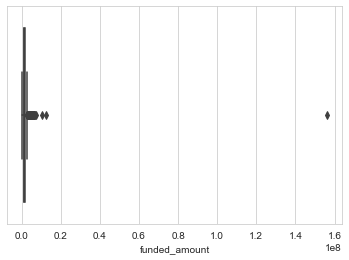

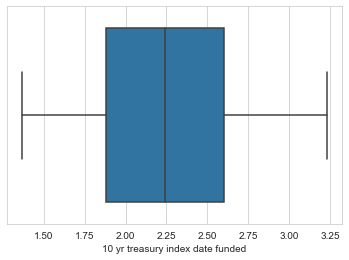

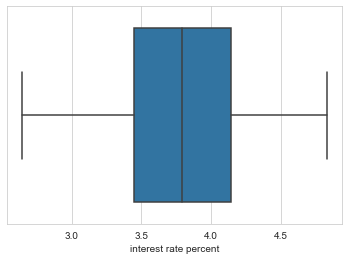

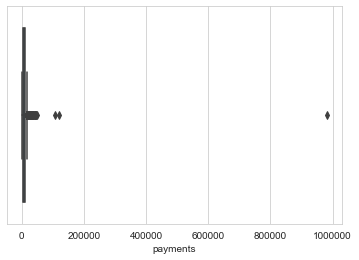

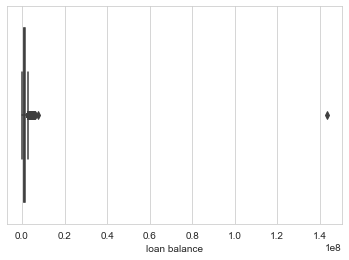

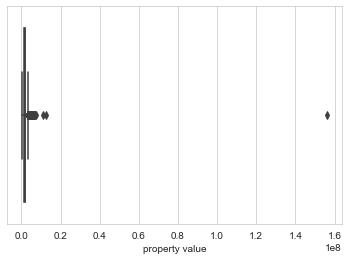

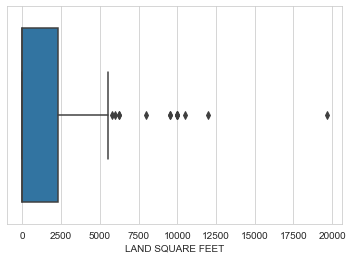

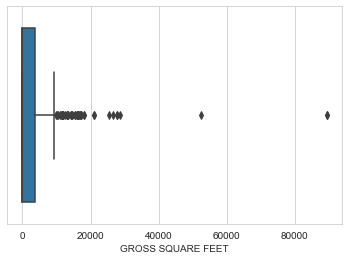

In [20]:
for i in df.columns:
    if df[i].dtypes == float or df[i].dtypes == int :
        sns.boxplot(df[i])
        plt.show()

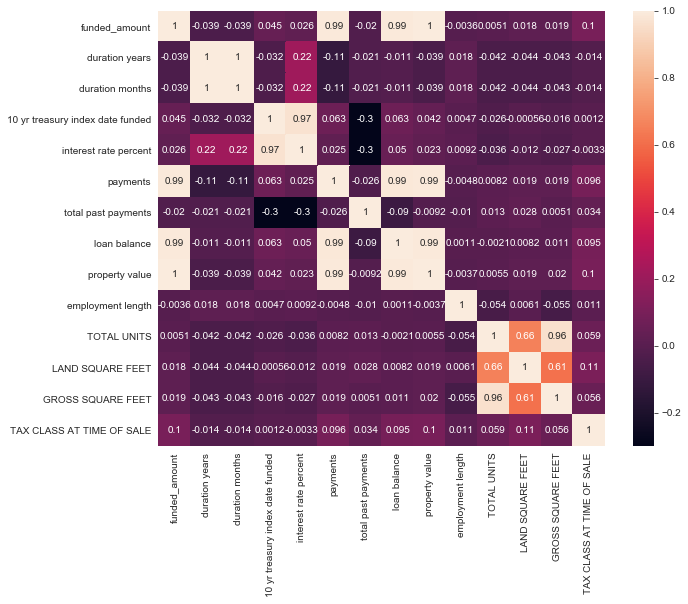

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Dropping Outliers
Dropping some outliers since it messes with the analysis

In [22]:
df_no_outlier = df.copy()
for i in ['funded_amount', 'payments', 'loan balance', 'property value']:
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 = Q1 
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_no_outlier = df_no_outlier[(df_no_outlier[i] > lower_limit) & (df_no_outlier[i] < upper_limit)]

In [23]:
df_no_outlier.head(10)

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,payments,total past payments,loan balance,property value,...,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS 1,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,2012-04-27,20,240,1.9600,3.359,4524.65,92,373732.18,930250.0,...,Vice President Global Field Services,6,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,171 SOUTH 9TH STREET,1,0.0,0.0,2
1,1720000.0,2014-10-14,15,180,2.2100,3.508,12302.74,62,957230.24,1995250.0,...,Senior program manager,10,04 TAX CLASS 1 CONDOS,1A,R3,1242 E 80TH ST,1,0.0,0.0,1
3,1079000.0,2012-02-23,20,240,1.9900,3.389,6196.40,94,496538.75,1402450.0,...,Vice presiden,17,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,79 EAGLE STREET,1,0.0,0.0,2
4,2028000.0,2016-04-01,20,240,1.7900,3.188,11439.05,45,1513242.57,2216500.0,...,Bank examiner,5,49 CONDO WAREHOUSES/FACTORY/INDUS,4,RW,34 NORTH 7TH STREET,1,0.0,0.0,4
5,612000.0,2017-10-26,20,240,2.4609,3.860,3663.61,26,516746.19,711850.0,...,Senior Director of Video Programming,3,07 RENTALS - WALKUP APARTMENTS,2A,C3,1586 PROSPECT PLACE,4,3194.0,3296.0,2
6,630000.0,2017-12-07,15,180,2.3700,3.669,4556.23,24,520650.57,667750.0,...,Field CTO,1,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,221 KINGSLAND AVENUE,1,0.0,0.0,2
7,795000.0,2017-10-06,20,240,2.3589,3.758,4716.77,26,672363.91,895850.0,...,vp of Sourcing and Supply Chain,11,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,221 KINGSLAND AVENUE,1,0.0,0.0,2
10,1790000.0,2018-12-11,20,240,2.8900,4.288,11120.61,12,1656552.66,1869300.0,...,Trading manager,11,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,221 KINGSLAND AVENUE,1,0.0,0.0,2
11,1890000.0,2016-06-13,20,240,1.6200,3.018,10498.93,42,1449044.81,1954850.0,...,SrUnderwriter,13,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,221 KINGSLAND AVENUE,1,0.0,0.0,2
12,1310000.0,2017-01-08,20,240,2.4193,3.818,7813.28,35,1036535.37,1364400.0,...,Practice Director,5,07 RENTALS - WALKUP APARTMENTS,2A,C3,136 AMITY STREET,4,2500.0,5000.0,2


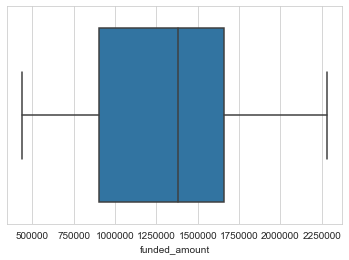

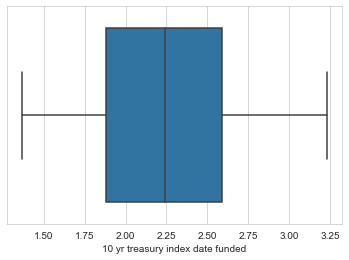

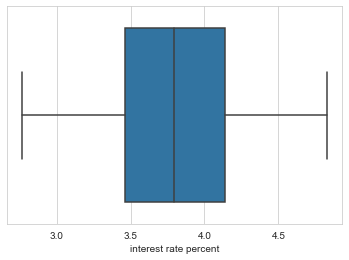

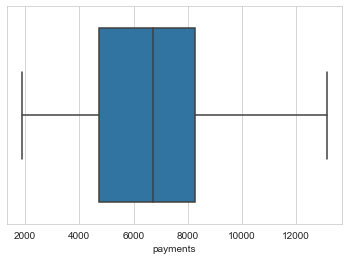

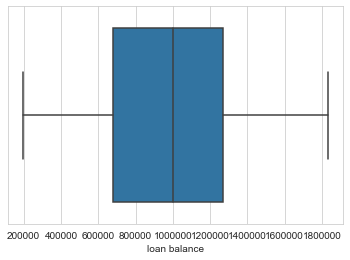

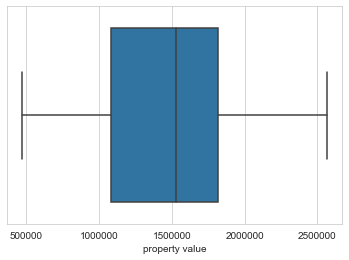

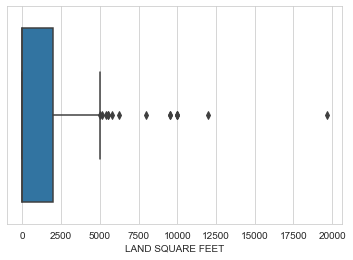

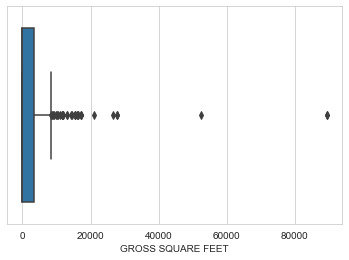

In [24]:
for i in df_no_outlier.columns:
    if df_no_outlier[i].dtypes == float or df_no_outlier[i].dtypes == int:
        sns.boxplot(df_no_outlier[i])
        plt.show()

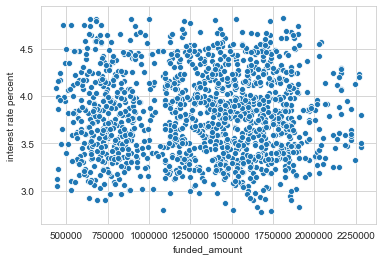

In [25]:
sns.scatterplot(x='funded_amount', y='interest rate percent', data=df_no_outlier)
plt.show()

## Quick Overview

- The higher the funded amount, the higher the consumer need to do payment for each month, this of course affects the loan balance left needed to be paid by the consumer. Also the higher the property amount, consumer will ask for more funded amount
- The lesser the duration, the more payment the consumer need to do each month
- The higher the 10 yr treasury index date funded the higher interest rate is
- Interest rate increases if fund amount is higher and duration is longer

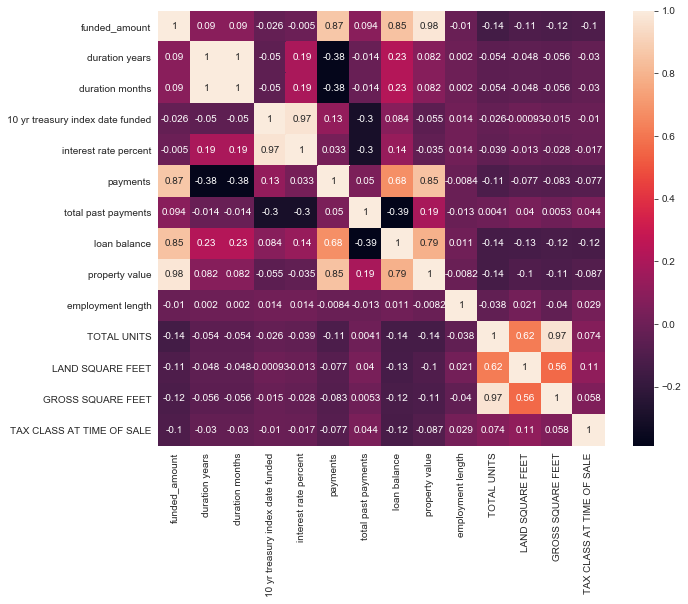

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outlier.corr(), annot=True)
plt.show()

In [27]:
df_no_outlier['funded_month'] = df_no_outlier['funded_date'].apply(lambda x: x.month)
df_no_outlier['funded_year'] = df_no_outlier['funded_date'].apply(lambda x: x.year)
df_no_outlier.set_index('funded_date', inplace=True)
df_no_outlier.sort_index(inplace=True)

## Month

- There are more loan taker in latter half of the year, looking at this data i think the marketing team can do more promos or campaign during the latter half of the year.
- Average-wise we could see in the linechart below, almost every year, interest rate increase near October and November (besides 2019 since there's Covid-19 Outbreak), with higher interest we will profit more if we give out more loan near October and November

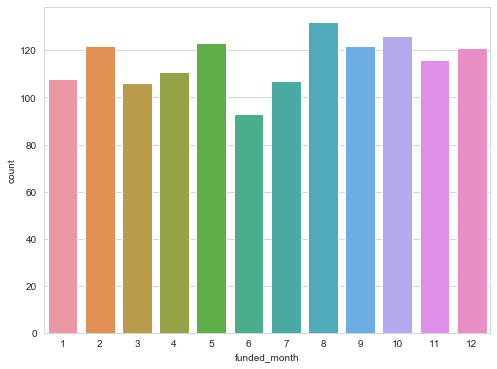

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_outlier['funded_month'])
plt.show()

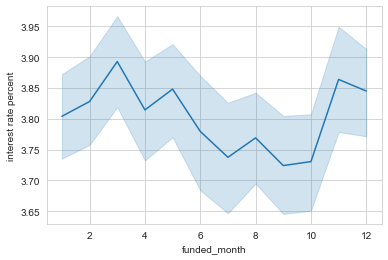

In [29]:
sns.lineplot(x = df_no_outlier['funded_month'], y=df_no_outlier['interest rate percent'])
plt.show()

Year  2015


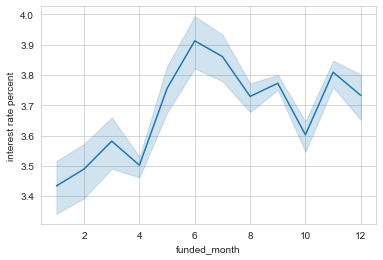

Year  2016


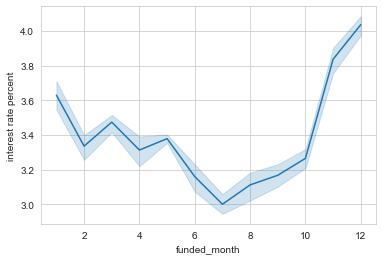

Year  2017


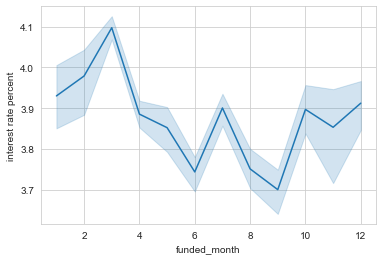

Year  2018


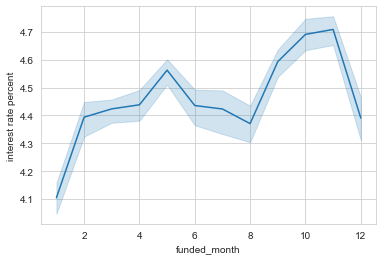

Year  2019


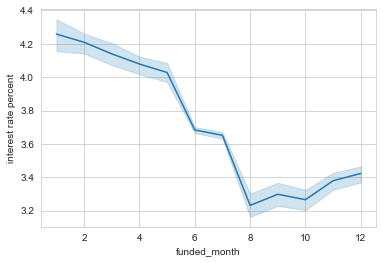

In [30]:
for i in range(2015,2020,1):
    print('Year ', i)
    sns.lineplot(x = df_no_outlier[df_no_outlier.index.year == i]['funded_month'], y=df_no_outlier[df_no_outlier.index.year == i]['interest rate percent'])
    plt.show()

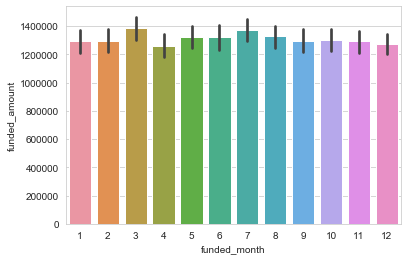

In [31]:
sns.barplot(data = df_no_outlier, x = 'funded_month', y ='funded_amount')
plt.show()

## Title

I don't find anything really useful here, other than the fact that most of loan-takers has high status / job, which make sense since we don't want to give loan to someone without a good job to pay it back.

In [32]:
df_no_outlier.groupby('title').mean().sort_values(by='funded_amount', ascending=False).head(15)

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate percent,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,funded_month,funded_year
title,,,,,,,,,,,,,,,,
Principal Director,2244000.0,30.0,360.0,2.53,4.128,10879.45,65.0,1536835.65,2524000.0,9.0,1.0,NaN,NaN,1.0,7.0,2014.0
Associate Attorney,2220000.0,30.0,360.0,2.04,3.638,10140.59,93.0,1276925.18,2482650.0,11.0,1.0,NaN,NaN,2.0,3.0,2012.0
vice president,2220000.0,30.0,360.0,1.98,3.578,10065.70,94.0,1273823.96,2483300.0,8.0,1.0,NaN,NaN,2.0,2.0,2012.0
Investment Professional,2220000.0,30.0,360.0,2.00,3.598,10090.63,81.0,1402658.81,2464550.0,8.0,1.0,NaN,NaN,2.0,3.0,2013.0
Vice President of Marketing,2220000.0,30.0,360.0,2.26,3.858,10417.69,54.0,1657444.86,2482850.0,4.0,4.0,1800.0,3780.0,2.0,6.0,2015.0
Vice President of Engineering,2184000.0,30.0,360.0,1.99,3.588,9914.73,50.0,1688263.33,2321600.0,5.0,1.0,NaN,NaN,2.0,10.0,2015.0
"VP, regional Manager",2160000.0,30.0,360.0,2.46,4.058,10384.53,64.0,1495390.31,2258400.0,1.0,1.0,0.0,0.0,1.0,8.0,2014.0
Cardiology Attending,2160000.0,30.0,360.0,2.69,4.288,10674.01,75.0,1359449.35,2274800.0,9.0,1.0,NaN,NaN,2.0,9.0,2013.0
Senior Project Manager,2148000.0,30.0,360.0,1.65,3.248,9345.87,89.0,1316217.21,2344900.0,18.0,1.0,0.0,0.0,1.0,7.0,2012.0


In [33]:
df_no_outlier['title'].value_counts().head(10)

Vice President       50
Owner                47
Director             43
President            41
Physician            33
CEO                  32
Partner              29
Managing Director    24
Attorney             24
Sales                18
Name: title, dtype: int64

## Duration

- The more duration the higher the interest rate
- Most loan-takers took 30 years duration loan
- The more duration the higher the funded amount given, but it seems average-wise the duration for 15 years has slightly higher funded amount than duration for 20 years. With the given information i have currently, then we might increase loan given with duration 15 years, since funded amount is slightly higher and the bank (lender) will get the money back faster (less riskier in case loan-taker suddenly cannot pay the loan)

In [34]:
df_no_outlier['duration years'].value_counts()

30    1153
15     193
20      40
10       1
Name: duration years, dtype: int64

In [35]:
df_grouped_years = df_no_outlier.groupby('duration years').mean()[['funded_amount', 'interest rate percent']]
df_grouped_years

,funded_amount,interest rate percent
duration years,,
10,1.190000e+06,3.479000
15,1.228588e+06,3.606870
20,1.187400e+06,3.643400
30,1.329653e+06,3.841059


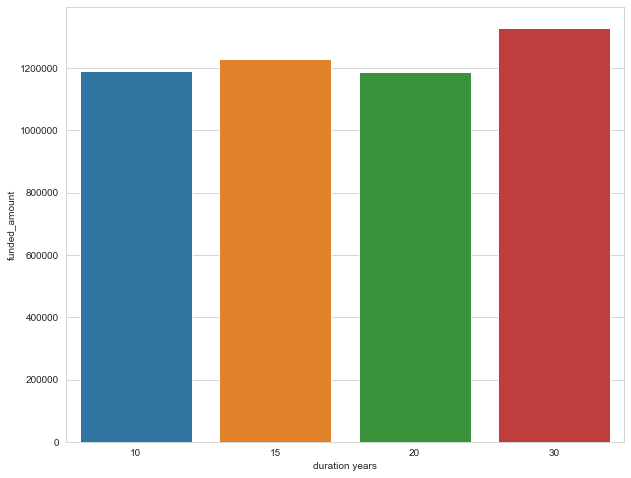

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_grouped_years.index, y=df_grouped_years['funded_amount'])
plt.show()

## Purpose

- Around the same overall, it seems the highest average interest rate is for the "home" purpose loan-takers though, so i would probably increase the aim to people with "home" purpose to generate more profit.

In [37]:
df_no_outlier['purpose'].value_counts()

investment property    448
home                   443
commerical property    431
boat                    50
plane                   15
Name: purpose, dtype: int64

In [38]:
df_no_outlier.groupby('purpose').mean()[['funded_amount', 'interest rate percent']]

,funded_amount,interest rate percent
purpose,,
boat,1.260230e+06,3.677080
commerical property,1.306900e+06,3.804566
home,1.317540e+06,3.825359
investment property,1.321780e+06,3.799913
plane,1.118667e+06,3.564333


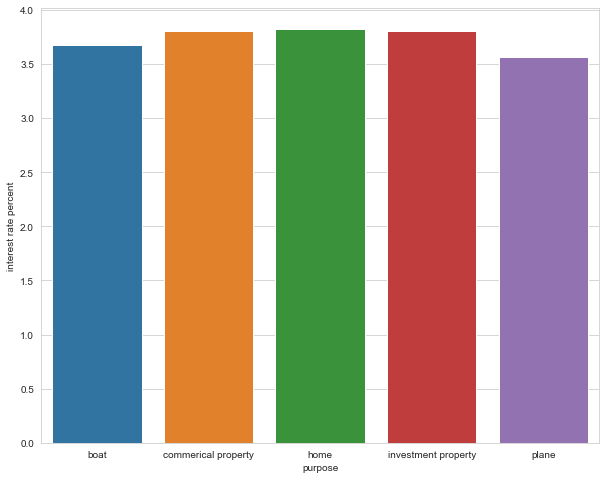

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_no_outlier.groupby('purpose').mean().index,
            y=df_no_outlier.groupby('purpose').mean()['interest rate percent'])
plt.show()